- Implementa los detectores de línea siguientes usando código en Python (es decir, sin usar librerías de OpenCV): Prewitt, Sobel y Laplaciano. Investiga la complejidad algoritmica de estos, ¿cual es más eficiente?
- Implementa un algoritmos de realce o mejoramiento de imágenes mediante un algoritmo de en el cual se extraen las líneas de la imagen y después se aplica la diferencia con la imagen original, multiplicando los píxeles de la imagen “máscara” (las líneas encontradas) por un factor alfa mayor a 1.
- Buscar una aplicación médica (en el libro de Gonzalez viene varios ejemplos de imágenes PET) y hacer mejoramiento usando la técnica de de la Figura 3.43 combinando diferentes etapas de procesamiento de imagenes

In [25]:
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
from scipy import ndimage

In [2]:
def apply_filter(I, H):
    h, w = I.shape                         # image dimensions (height, width)
    n = H.shape[0]                         # filter size
    p = n // 2                             # padding size
    J = np.zeros_like(I)                   # output image, initialized with zeros

    for x in range(p, h-p):
        for y in range(p, w-p):
            J[x, y] = np.sum(I[x-p:x+n-p, y-p:y+n-p] * H)
            
    return J

In [17]:
def get_image():
    path = 'assets/img1.jpg'
    image = Image.open(path)
    image = image.convert('1') # convert image to black and white

    return np.array(image)

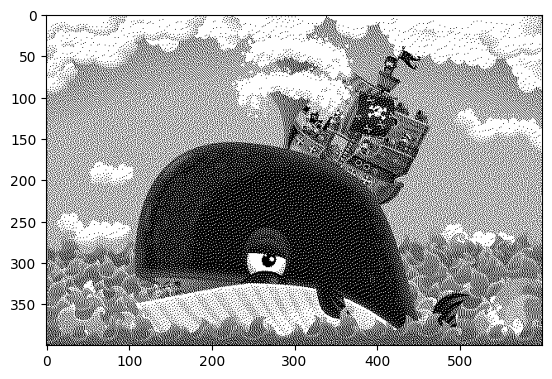

In [18]:
image = get_image()

plt.imshow(image, cmap='gray',vmin=0.0, vmax=1.0)
plt.show()

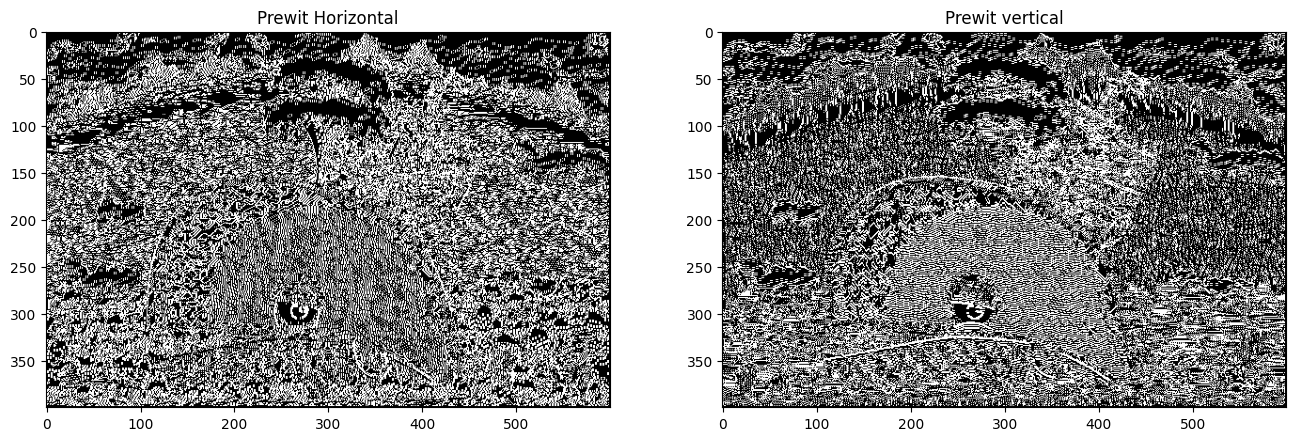

In [36]:
#Prewit
image = get_image()
prewitt_y = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])
prewitt_x = np.rot90(prewitt_y)
Jy = apply_filter(image, prewitt_y)
Jx = apply_filter(image, prewitt_x)

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(Jx, cmap='gray')
a.set_title("Prewit Horizontal")

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(Jy, cmap='gray')
a.set_title("Prewit vertical")

plt.show()

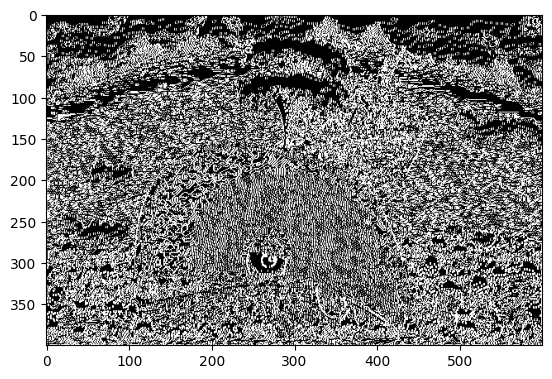

In [20]:
#Con libreria
image = get_image()
image = ndimage.prewitt(image)

plt.imshow(image, cmap='gray',vmin=0.0, vmax=1.0)
plt.show()

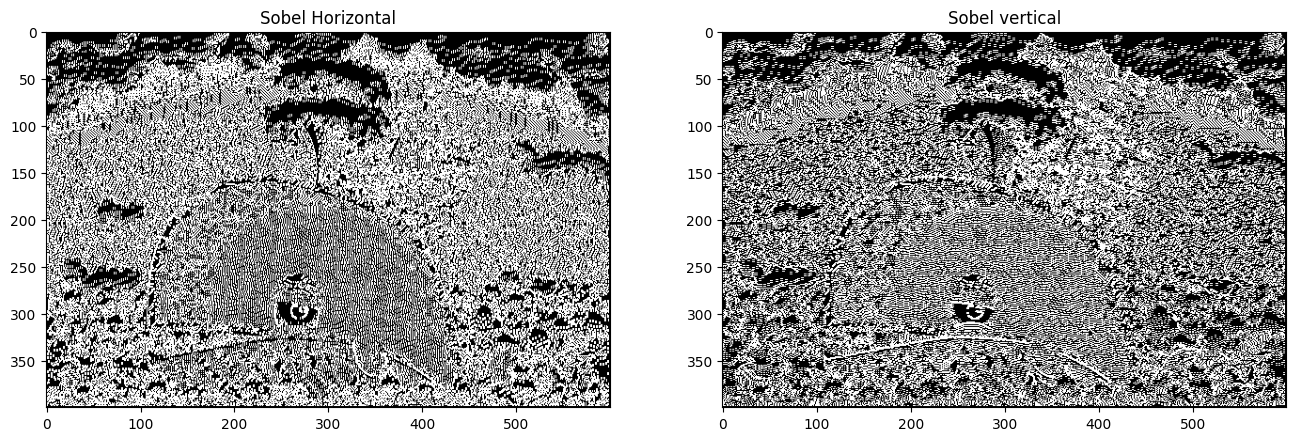

In [33]:
#Sobel
image = get_image()
sobel_y = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])
sobel_x = np.rot90(sobel_y)
Jy = apply_filter(image, sobel_y)
Jx = apply_filter(image, sobel_x)

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(Jx, cmap='gray')
a.set_title("Sobel Horizontal")

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(Jy, cmap='gray')
a.set_title("Sobel vertical")

plt.show()

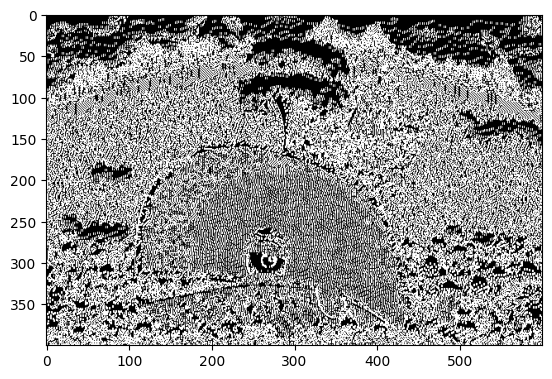

In [22]:
#Con libreria    
image = get_image()
image = ndimage.sobel(image)

plt.imshow(image, cmap='gray',vmin=0.0, vmax=1.0)
plt.show()

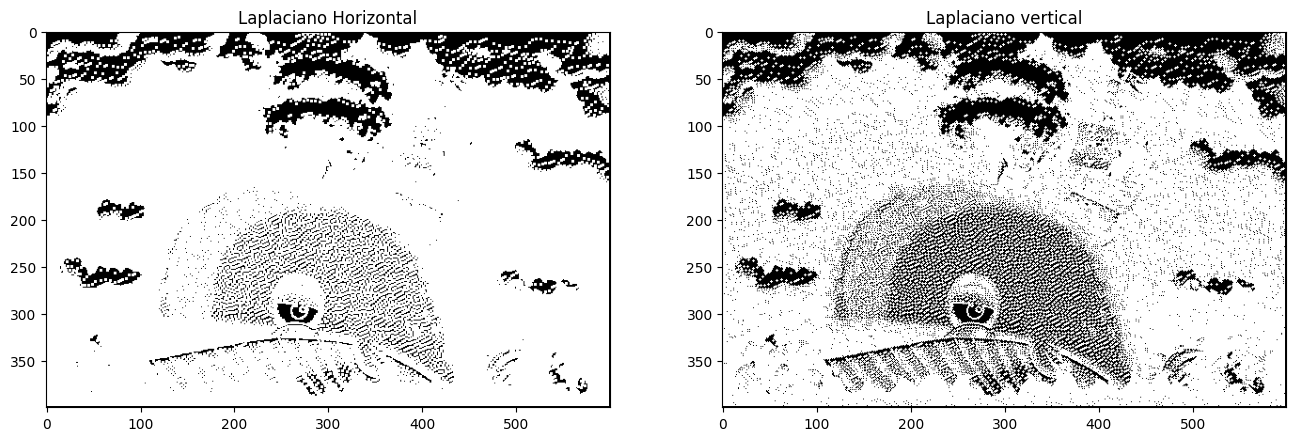

In [40]:
#Laplaciano
image = get_image()
laplacian_y = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])
laplacian_x = np.rot90(laplacian_y)
laplacian_x = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])
Jy = apply_filter(image, laplacian_y)
Jx = apply_filter(image, laplacian_x)

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(Jx, cmap='gray')
a.set_title("Laplaciano Horizontal")

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(Jy, cmap='gray')
a.set_title("Laplaciano vertical")

plt.show()

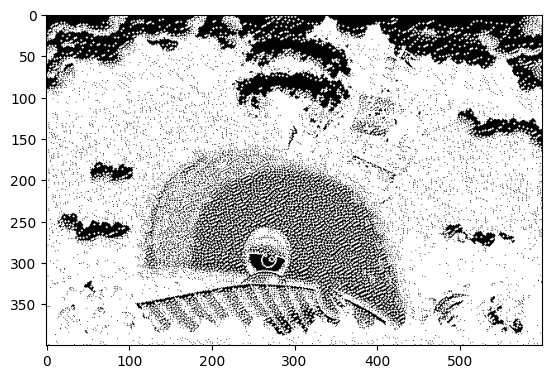

In [38]:
#Con libreria    
image = get_image()
image = ndimage.laplace(image)

plt.imshow(image, cmap='gray',vmin=0.0, vmax=1.0)
plt.show()